In [66]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import glob
import skimage.io
import cv2
import seaborn as sns

In [22]:
canvas = "input/empty_canvas.jpg"
output = "output/paths.jpg"
pickles = "../customer_segmentation/maskrcnn/output/coords/*"

In [23]:
filepaths = sorted(glob.glob(pickles))

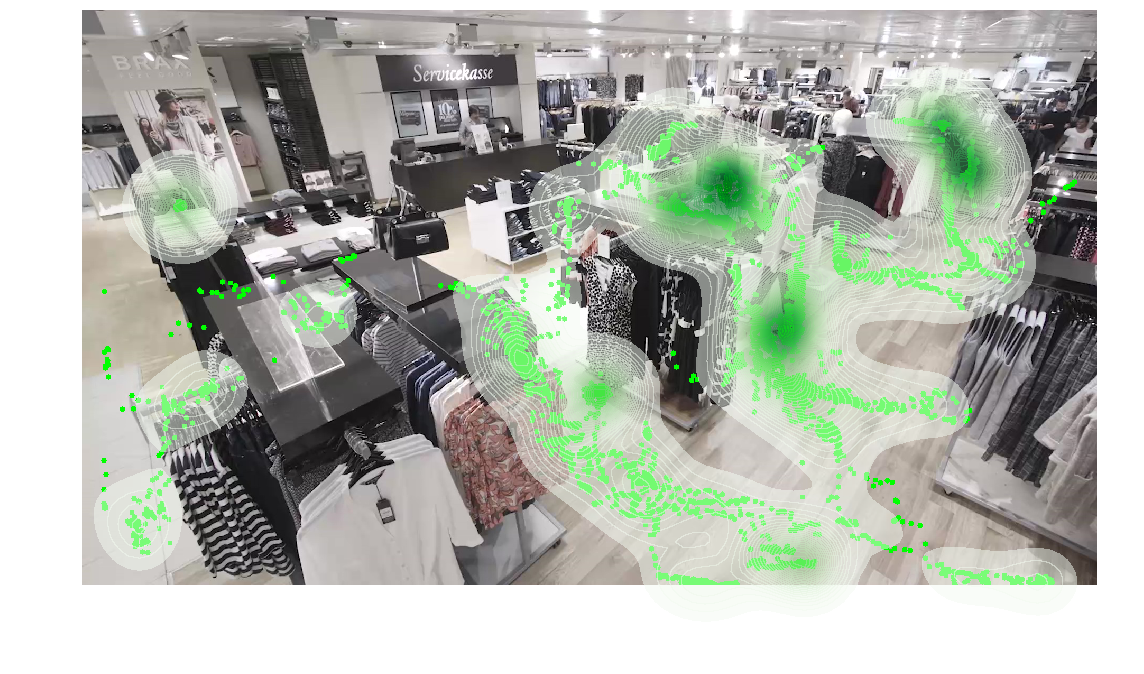

In [80]:
image = skimage.io.imread(canvas)
x = []
y = []
for i, f in enumerate(filepaths):
    points = pickle.load(open(f, "rb"))
    for p in points:
        x.append(p[0])
        y.append(p[1])
        cv2.circle(image, p, 5, (0, 255, 0), -1)

f, ax = plt.subplots(figsize=(16, 16))
ax.imshow(image)
ax = sns.kdeplot(x, y, cmap="Greens", shade=True, shade_lowest=False, n_levels=70, alpha=0.5)

plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0,0)
f.tight_layout()
f.savefig(output, bbox_inches="tight", pad_inches = 0)